<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 5
<br>Group member1: Martim negalho Lisboa Simões
<br>Group member2: Nathan Girard
<br>Group member3: Camil Hamdane
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional: Create your favorite neuron
    
<font size ="3">Write code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. Add three branches to the first dendrite. Set different geometrical properties to your morphology (diameter, lenght). Show the resulting model.  

# <font color= 'red'>Ex1:</font> Visualizing neurons    
    
<font size ="3">Select one of the neurons from your group data set. Write code that generates two plots:
    
    1. Visualize the neuron oriented in the three possible planes (xy, xz, yz). 
    2. Visualize each of the neurites odf your morphoology(in a single plane).

<font size ="3"> For each visualization plot everything in a single plot (use subplots). Make sure to title the figure with cell name and the subplots with respective title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. <font color= 'red'>[1.5 pts]

In [273]:
import neurom as nm
import matplotlib.pyplot as plt
from neurom import view
from neurom.view.matplotlib_utils import (
    update_plot_limits,
)  # from NeuroM we import utils function to adjust the plot limits

In [274]:
neuron = nm.load_morphology("04/morph_02.swc")

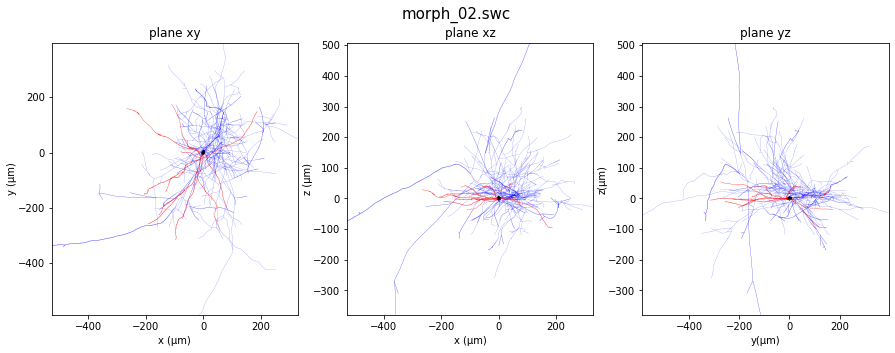

In [275]:
# figure, axis = viewer.draw(neuron, mode='2d', plane='xy')
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
view.plot_morph(neuron, plane="xy", ax=ax[0])
update_plot_limits(
    ax[0], white_space=0
)  # set your x, y plot limits to match with your neuron

# the axis handler is returend for further customization
ax[0].set_title("plane xy")
ax[0].set_xlabel("x (μm)")
ax[0].set_ylabel("y (μm)",labelpad = 0.2);

view.plot_morph(neuron, plane="xz", ax=ax[1])
update_plot_limits(
    ax[1], white_space=0
)
ax[1].set_title("plane xz")
ax[1].set_xlabel("x (μm)")
ax[1].set_ylabel("z (μm)",labelpad = 0.2);

view.plot_morph(neuron, plane="yz", ax=ax[2])
update_plot_limits(
    ax[2], white_space=0
)
ax[2].set_title("plane yz")
ax[2].set_xlabel("y(μm)")
ax[2].set_ylabel("z(μm)",labelpad = 0.2);

fig.suptitle(neuron.name, fontsize=15);

Neuron seen in each of the three orientations

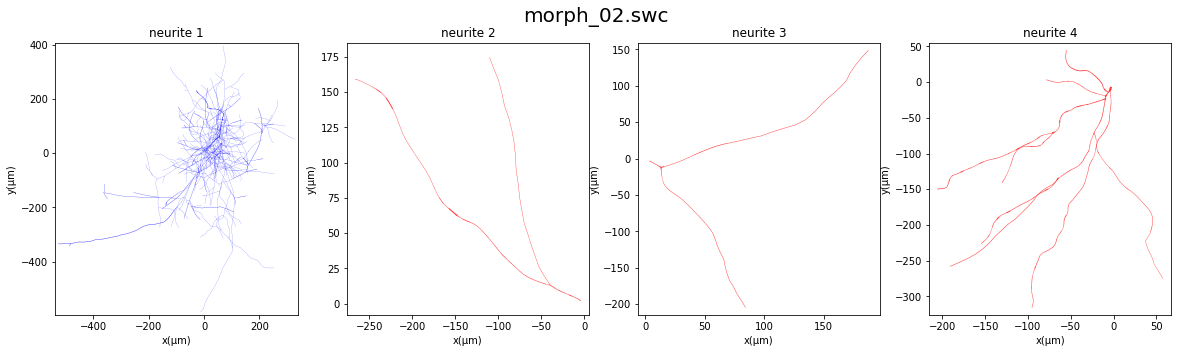

In [276]:
neurites = neuron.neurites
N = len(neurites)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20,5)) # figsize in inches (width, height)

for i, neurite in enumerate(neurites):
    current_axes = axes[i]
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.plot_tree(neurite, ax=current_axes, plane="xy")
    update_plot_limits(current_axes, white_space=10)

    # remove the xy axes for a prettier result
    # current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_title("neurite {}".format(i+1))
    current_axes.set_xlabel("x(μm)")
    current_axes.set_ylabel("y(μm)")

# set a global title for the figure
fig.suptitle(neuron.name, fontsize=20);

Neurites

# <font color= 'red'>Ex2:</font> Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, in your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. <font color= 'red'>[2 pts]

In [277]:
import neurom
from neurom.check.runner import CheckRunner

In [278]:
# the structural checks concern the valid structure of a morphology
# the neuron_checks are more specific to simulation
# options set the tolerance parameters for the checks

config = {
    "checks": {
        "morphology_checks": [
            "has_axon",
            "has_basal_dendrite",
            "has_apical_dendrite",
            "has_no_jumps",
            "has_no_fat_ends",
            "has_nonzero_soma_radius",
            "has_all_nonzero_neurite_radii",
            "has_all_nonzero_section_lengths",
            "has_all_nonzero_segment_lengths",
            "has_no_flat_neurites",
            #"has_no_root_node_jumps",
            "has_no_narrow_start",
            "has_no_dangling_branch",
        ]
    },
    "options": {
        "has_nonzero_soma_radius": 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    },
}

In [279]:
# create a CheckRunner object by providing the configuration dict
check_runner = CheckRunner(config)
help(CheckRunner.run)

Help on function run in module neurom.check.runner:

run(self, path)
    Test a bunch of files and return a summary JSON report.



In [280]:
#Run Check Runner in the file containing all neuron morphologies
results = check_runner.run("04/")

                Has apical dendrite FAIL
                                ALL FAIL
                Has apical dendrite FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no dangling branch FAIL
                                ALL FAIL
                Has apical dendrite FAIL
                       Has no jumps FAIL
      Has all nonzero neurite radii FAIL
             Has no dangling branch FAIL
                                ALL FAIL
                Has apical dendrite FAIL
                                ALL FAIL
                       Has no jumps FAIL
                                ALL FAIL
                Has apical dendrite FAIL
                       Has no jumps FAIL
                                ALL FAIL
                           Has axon FAIL
                       Has no jumps FAIL
             Has no dangling branch FAIL
                                ALL FAIL


In [281]:
#print Results
for morph in results["files"]:

    print("Morphology: {} \n".format(morph))

    checks_dict = results["files"][morph]

    # empty strings for our results
    passed = ""
    failed = ""

    # iterate over dictionary's items
    for check_name, status in checks_dict.items():

        # the string with the check's name and status
        string = "\t{0: <50} : {1}\n".format(check_name, status)

        # separate passed from failed checks
        if status is True:
            passed += string  # concatenates to the current passed string

        else:
            failed += string  # concatenats to the current failed string

    print(passed)
    print(failed)

Morphology: 04/morph_04.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has apical dendrite                                : False
	ALL                                                : False

Morphology: 04/morph_05.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                               

1)
Has no jumps

2)
Has apical dendrite

3)
Has axon 
Has no jumps
Has no dangling branch

4)
Has apical dendrite

5) 
PERFECT

6)
Has apical dendrite
Has no jumps 
Has all nonzero neurite radii
Has no dangling branch 

7)
PERFECT!

8)
PERFECT!

9)
Has apical dendrite
Has no jumps 
Has no fat ends 
Has no dangling branch

10)
Has apical dendrite
Has no jumps

Explanation of different tyoes of errors:
As is explained in the docs https://neurom.readthedocs.io/en/v2.0.3/morph_check.html there are two different types of checks (even if the distinction between these was dropped in the code after version v2 of neurom):

Structural Checks - Failure in these checks indicates an inconsistent reconstruction of the cell. Data that does not pass these checks describes an impossible cell structure. In our configs, the following are structural checks:

            "has_no_jumps" - Checks if there is continuity in the coordinates of the points describing each of the neurites. If the x,y or z values of two conscutive points differ by an amount greater than a given max distance, then continuity is broken and a jump is identified
            "has_no_fat_ends" - Checks if the final point in a neurite has a radius that is greater by a certain factor (multiple_of_mean) than the average radius of a given number of previous points
            "has_nonzero_soma_radius" - Checks if the soma is present.
            "has_all_nonzero_neurite_radii" - Checks if all points in a neurite have a defined radius value
            "has_all_nonzero_section_lengths" - Checks if all the defined neuron sections have a length.
            "has_all_nonzero_segment_lengths" - Checks if all segments of a neurite have non zero length. Ensures that there are not two repeated points
            "has_no_flat_neurites" - Checks if the the ratio between the extents of neurites along each of their principal direction is smaller than a given tolerance. 
            "has_no_narrow_start" - Checks if the radius at the root node of a neurite is substantially smaller than the radius of the first node. This ensures that neurites are correctly distiguished from their root.
            "has_no_dangling_branch" - Checks if the neurites are separated from the soma and from eachother. By dangling, the following is meant:                
     Are considered dangling
    - dendrites whose first point is too far from the soma center
    - axons whose first point is too far from the soma center AND from
      any point belonging to a dendrite
      

Neuron Checks - Determine what neuronal constituents are present and hence the overall quality of the reconstruction. Failure in some of these checks doesn't invalidate the reconstruction. For example, a neuron does not need to have apical dendrites, meaning that a reconstruction that fails the "Has apical dendrite" check might still be of excellent quality:

            "has_axon" - Checks if an axon was identified
            "has_basal_dendrite" - Checks presence of basal dendrites
            "has_apical_dendrite" - Checks presence of apical dendrites
            "has_nonzero_soma_radius" - Checks if the soma is present.



The following morphologies are correct:

morph_02.swc

morph_04.swc

morph_05.swc

morph_07.swc

morph_08.swc

# <font color= 'red'>Ex3:</font> Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Find the morphometric charachteristics that best enable you to classify the cells into different groups, such as:

    section_lengths, soma_volume, neurite_volume_density, ...

Plot the results for each metric in a histogram. Do you see any differences? If yes, explain them. Would using a combination of morphometric characteristics improve the classification?  <font color= 'red'>[2.5 pts]

In [292]:
# Make sure that all the plots will be shown
%matplotlib inline 

# import the packages
import matplotlib.pyplot as plt
import neurom as nm
import numpy as np

In [293]:
# Morphologically correct neurons
neuron_2 = nm.load_morphology("04/morph_02.swc")
neuron_4 = nm.load_morphology("04/morph_04.swc")
neuron_5 = nm.load_morphology("04/morph_05.swc")
neuron_7 = nm.load_morphology("04/morph_07.swc")
neuron_8 = nm.load_morphology("04/morph_08.swc")

#help(nm.features.morphology)

In [294]:
#Measurements
def get_metrics(neuron):
    # Extract section_lengths
    section_lengths_neuron = nm.get("section_lengths", neuron)
    #print("Section lengths: \n", section_lengths_neuron)
    #print(len(section_lengths_neuron))
    # Extract the local bifurcation angles
    local_bif_angles = nm.get("local_bifurcation_angles", neuron)
    #print("\nSection local bifurcation angles: \n", local_bif_angles)

    #Extract soma volume
    soma_volume = nm.get("soma_volume", neuron)
    #print("\nSoma Volume: \n", soma_volume)
    #Extract neurite volume density
    neurite_volume_density = nm.get("neurite_volume_density", neuron)
    #print("\nNeurite Volume Density: \n", neurite_volume_density)
    
    trunk_origin_radii = nm.get('trunk_origin_radii', neuron)
    print(trunk_origin_radii)

    metrics = {
        "section_lengths": section_lengths_neuron,
        "local_bifurcation_angles": local_bif_angles,
        "soma_volume": soma_volume,
        "neurite_volume_density":neurite_volume_density,
        "trunk_origin_radii": trunk_origin_radii,
        }
    return metrics

In [295]:
metrics_2 = get_metrics(neuron_2)
metrics_4 = get_metrics(neuron_4)
metrics_5 = get_metrics(neuron_5)
metrics_7 = get_metrics(neuron_7)
metrics_8 = get_metrics(neuron_8)

[0.475, 0.435, 0.475, 1.09]
[0.415, 1.245, 1.11, 0.555, 0.275, 0.415, 0.415, 0.415]
[1.29, 0.625, 0.625, 1.105, 1.51, 0.44, 0.59, 0.625, 1.03, 3.645]
[0.54, 0.54, 0.42, 0.36, 0.3, 0.42, 1.385]
[1.03, 1.03, 1.085, 0.745, 0.4, 1.2]


In [314]:
#function for plots
def plot_metrics(metrics,titlestr,xlabel,ylabel):
    """Generates a histogram in a new figure"""

    # create an image with one subplot
    f, ax = plt.subplots(2, 3, figsize=(18,10))
    
    data = metrics["section_lengths"]
    f.suptitle(titlestr)
    # create a histogram and a boxplot 
    ax[0][0].hist(data,bins=10)
    ax[0][0].set_title("Section Lengths ")
    ax[0][0].set_xlabel("μm")
    ax[0][0].set_ylabel(ylabel)

    ax[1][0].boxplot(data)  
    ax[1][0].set_ylabel("μm")

    data = metrics["neurite_volume_density"]
    #print(data)
    ax[0][1].plot(range(1,len(data)+1),data,'-kx')
    ax[0][1].set_title("Neurite Volume Density")
    ax[0][1].set_ylabel("Neurite Volume Density")
    ax[0][1].set_xlabel("Neurite")
    ax[0][1].set_yscale("log")
    ax[1][1].boxplot(data) 
    ax[1][1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))  
    
    data = metrics["trunk_origin_radii"]
    #print(data)
    
    # create a histogram and a boxplot 
    ax[0][2].hist(data, bins =300)
    ax[0][2].set_title("Trunk Origin Radii")
    ax[0][2].set_xlabel("μm")
    ax[0][2].set_ylabel(ylabel)
    ax[1][2].boxplot(data)  
    ax[1][2].set_ylabel("μm")
    return

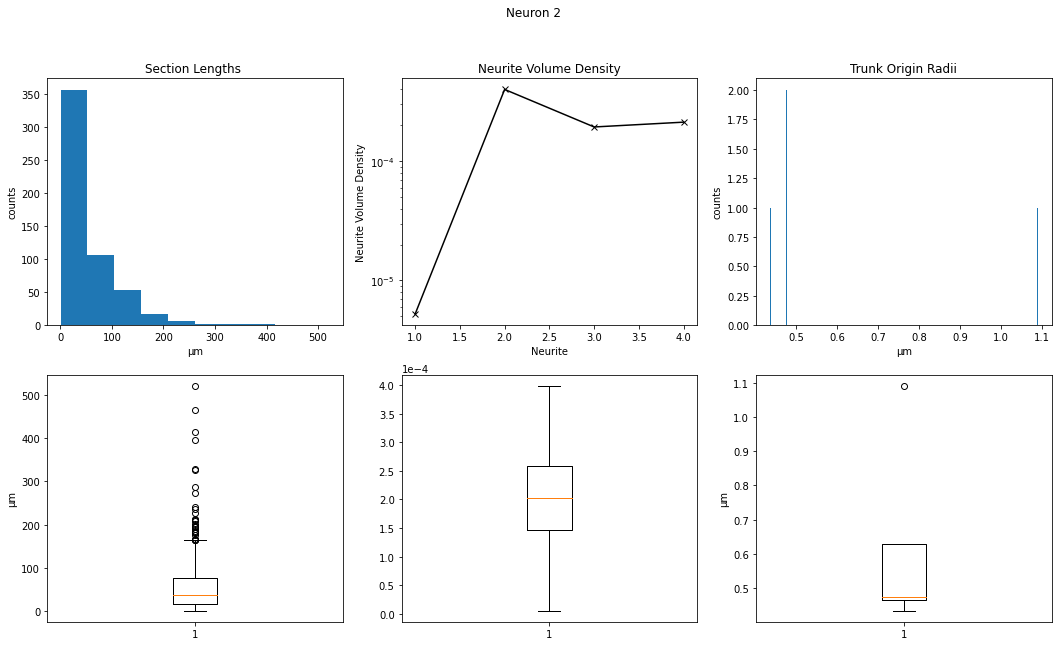

In [315]:
plot_metrics(metrics_2,"Neuron 2","μm","counts")

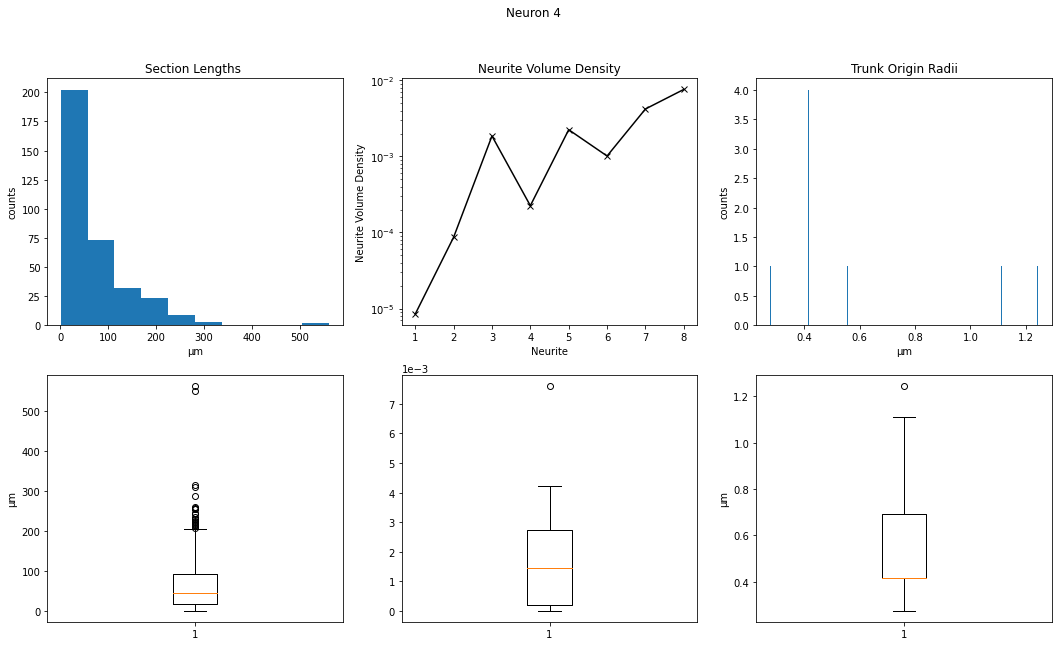

In [316]:
plot_metrics(metrics_4,"Neuron 4","μm","counts")

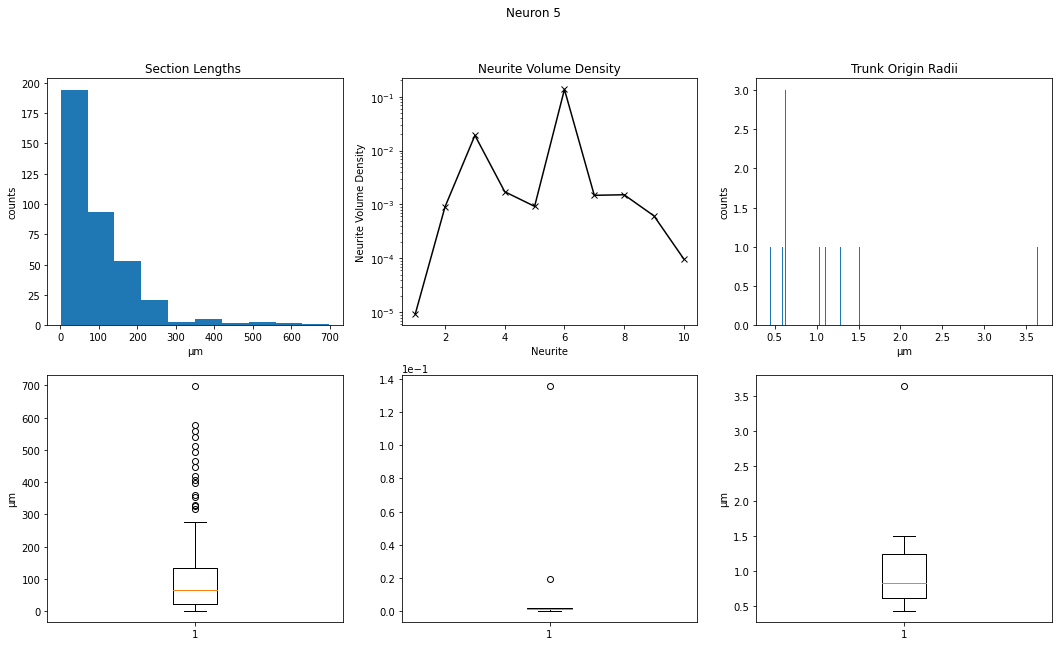

In [317]:
plot_metrics(metrics_5,"Neuron 5","μm","counts")

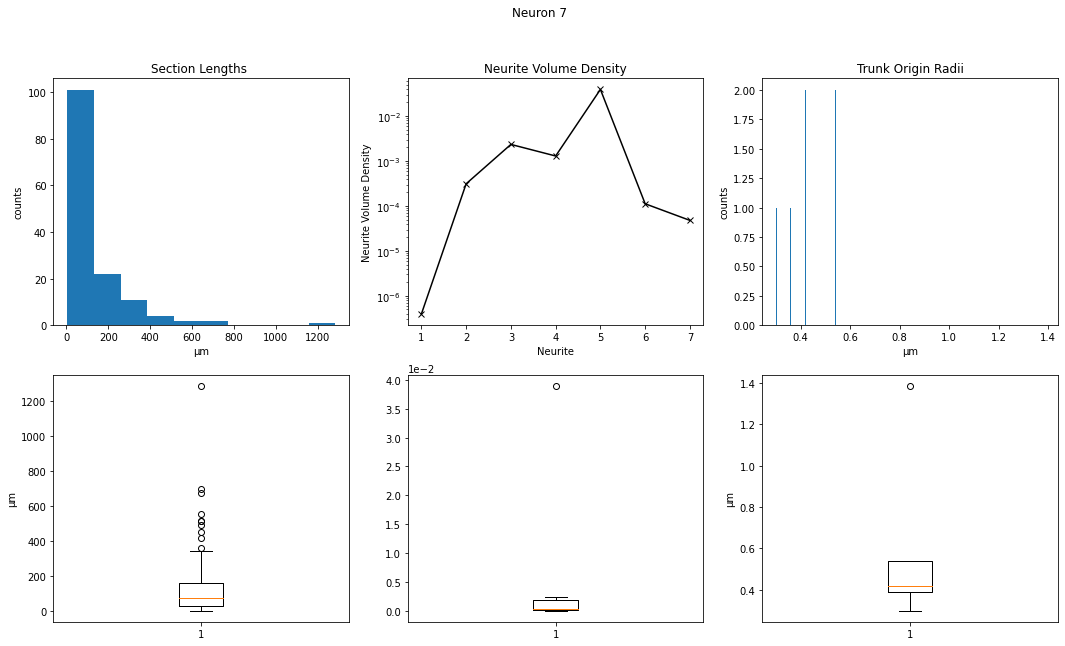

In [318]:
plot_metrics(metrics_7,"Neuron 7","μm","counts")

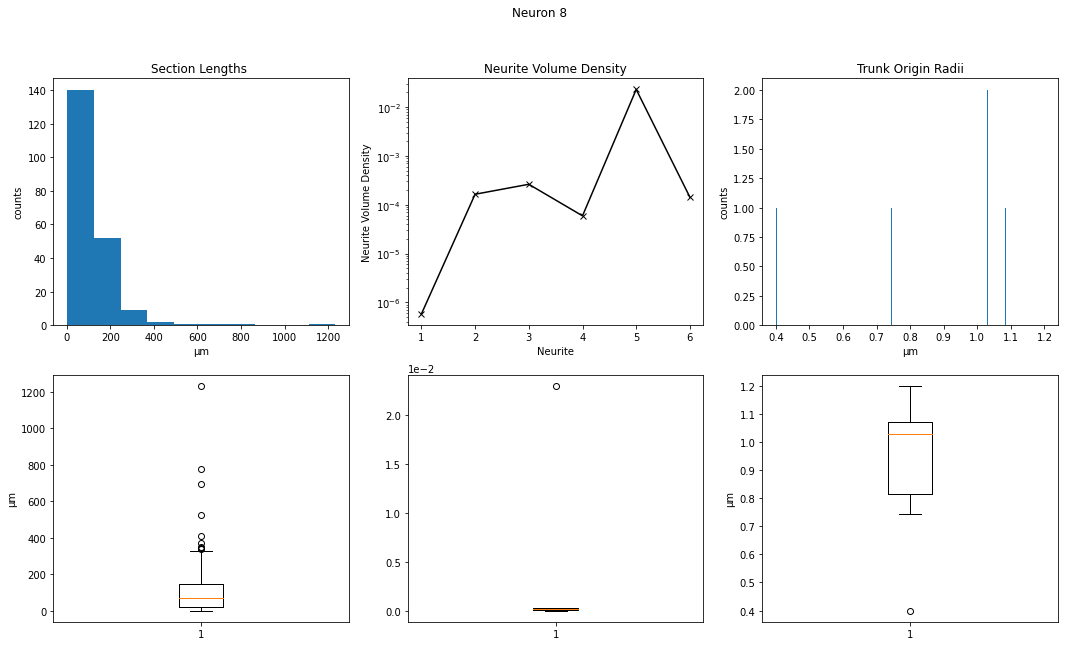

In [319]:
plot_metrics(metrics_8,"Neuron 8","μm","counts")

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex2 and Ex3.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://academic.oup.com/cercor/article/29/4/1719/5304727)